## Image Segmentation
- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of object
- We will first find 'K' dominant colors in the image
- We will then use Kmeans to assign each pixel of the image the color from the dominant 'K' colors

In [97]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

(225, 225, 3)


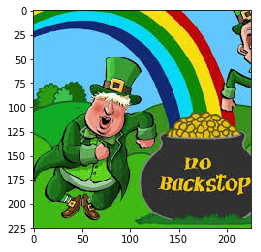

In [98]:
img = cv2.imread('cartoon.jpg')
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
print(img.shape)
plt.imshow(img)

## Flatten each channel of the image 
- Flattening of channel is essential as KMeans takes only 2D array.


In [99]:
all_pixels = img.reshape((-1,3))
print(all_pixels.shape)

(50625, 3)


In [100]:
from sklearn.cluster import KMeans

In [101]:
dominant_colors = 4
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [102]:
centers = km.cluster_centers_
centers = np.array(centers,dtype='uint8')
# uint8 represents unsigned int of 8 bit.
print(centers)

[[ 80 201 246]
 [ 51  51  46]
 [216 180  69]
 [ 50 153  32]]


### Plot these colors by making color swatches


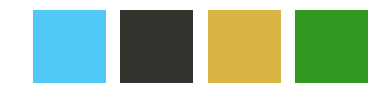

In [103]:
#plt.figure(0,figsize=(4,4))
for i in range(centers.shape[0]):
    plt.subplot(1,4,i+1)
    plt.axis('off')
    # making color swatches
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = centers[i]
    #print(a)
    plt.imshow(a)
plt.show()
    
# So we have extracted 4 most dominant colors


In [104]:
a = np.zeros((100,100,3),dtype='uint8')
a[:,:,:] = centers[0]
print(a[99][99])

[ 80 201 246]


## Segmenting our original image

In [105]:
print(km.labels_)
# this will give labels for every pixel to the nearest dominant color

[2 2 2 ... 3 3 3]


In [106]:
new_img = np.zeros(all_pixels.shape,dtype='uint8')
print(new_img.shape)

(50625, 3)


(225, 225, 3)


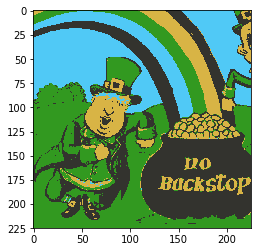

In [107]:
for ix in range(new_img.shape[0]):
    new_img[ix] = centers[km.labels_[ix]]

new_img = new_img.reshape(img.shape)
print(new_img.shape)

plt.imshow(new_img)
plt.show()

# OUR IMAGE IS SHOWN WITH THE DOMINANT COLOURS